# **1. Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")


c:\Users\ACER\ANA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# **2. Load dataset**

In [2]:
data = pd.read_csv("./datasets/marketing_campaign.csv", sep="\t")

# **3. Basic exploration**

In [3]:
print(f"Shape of the dataset: {data.shape}")
print(f"\nGlimpse of the dataset:")
data.head().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

Shape of the dataset: (2240, 29)

Glimpse of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
print(f"Information of the dataset:\n")
print(data.info())

Information of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsP

In [5]:
print(f"Summary of the dataset:")
data.describe().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

Summary of the dataset:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


In [6]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [7]:
print(f"Null values of the dataset:")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

Null values of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Insights**:
- There are missing values in Income. The rows with missing income values will be dropped.
- Dt_Customer that indicates the date a customer joined is not parsed as DateTime.

In [8]:
data.dropna(axis=0, inplace=True)
print(f"After dropping null values, the shape of the dataset is {data.shape}")
print(f"After dropping null values, null values of the dataset:")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

After dropping null values, the shape of the dataset is (2216, 29)
After dropping null values, null values of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print(f"Newest customer's enrollment date is {max(dates)}")
print(f"Oldest customer's enrollment date is {min(dates)}")

Newest customer's enrollment date is 2014-06-29
Oldest customer's enrollment date is 2012-07-30


In [10]:
days = []
newest = max(dates)
for i in dates:
    duration = newest - i
    days.append(duration)
data["Customer Loyalty"] = days
data["Customer Loyalty"] = data["Customer Loyalty"].dt.days
data["Age"] = 2025 - data["Year_Birth"]
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Parental Status"] = np.where(data["Children"] > 0, 1, 0)
data["Marital_Status"].replace({"Married": "Couple", "Together": "Couple", "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"}, inplace=True)
data["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}, inplace=True)
data["Total Promo"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]
data.rename(columns={"Marital_Status": "Marital Status", "MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold", "NumWebPurchases": "Web", "NumCatalogPurchases": "Catalog", "NumStorePurchases": "Store", "NumDealsPurchases": "Discount Purchases"}, inplace=True)
data = data[["ID", "Age", "Education", "Marital Status", "Parental Status", "Children", "Kidhome", "Teenhome", "Income", "Spent", "Customer Loyalty", "Recency", "Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold", "Web", "Catalog", "Store", "Discount Purchases", "Total Promo", "NumWebVisitsMonth"]]

data = data[data["Age"] < 90]
data = data[data["Income"] < 600000]

In [11]:
print(f"After preprocessing, let's have a glimpse of the final dataset:")
data.head().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

After preprocessing, let's have a glimpse of the final dataset:


,ID,Age,Education,Marital Status,Parental Status,Children,Kidhome,Teenhome,Income,Spent,Customer Loyalty,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,5524,68,Graduate,Alone,0,0,0,0,58138.000000,1617,663,58,635,88,546,172,88,88,8,10,4,3,0,7
1,2174,71,Graduate,Alone,1,2,1,1,46344.000000,27,113,38,11,1,6,2,1,6,1,1,2,2,0,5
2,4141,60,Graduate,Couple,0,0,0,0,71613.000000,776,312,26,426,49,127,111,21,42,8,2,10,1,0,4
3,6182,41,Graduate,Couple,1,1,1,0,26646.000000,53,139,26,11,4,20,10,3,5,2,0,4,2,0,6
4,5324,44,Postgraduate,Couple,1,1,1,0,58293.000000,422,161,94,173,43,118,46,27,15,5,3,6,5,0,5


In [12]:
print(f"After preprocessing, let's have a look on the summary of the dataset:")
data.describe().style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

After preprocessing, let's have a look on the summary of the dataset:


,ID,Age,Parental Status,Children,Kidhome,Teenhome,Income,Spent,Customer Loyalty,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,56.086347,0.714286,0.947559,0.441682,0.505877,51958.810579,607.268083,353.714286,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,4.088156,2.672242,5.806510,2.324593,0.298373,5.321429
std,3247.523735,11.701599,0.451856,0.749466,0.536955,0.544253,21527.278844,602.513364,202.494886,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,2.742187,2.927542,3.250939,1.924507,0.679570,2.425597
min,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,48.000000,0.000000,0.000000,0.000000,0.000000,35233.500000,69.000000,180.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,1.000000,0.000000,3.000000
50%,5454.500000,55.000000,1.000000,1.000000,0.000000,0.000000,51371.000000,397.000000,356.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,4.000000,2.000000,5.000000,2.000000,0.000000,6.000000
75%,8418.500000,66.000000,1.000000,1.000000,1.000000,1.000000,68487.000000,1048.000000,529.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,3.000000,0.000000,7.000000
max,11191.000000,85.000000,1.000000,3.000000,2.000000,2.000000,162397.000000,2525.000000,699.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,27.000000,28.000000,13.000000,15.000000,4.000000,20.000000


In [13]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

,count,unique,top,freq
Education,2212,3,Graduate,1115
Marital Status,2212,2,Couple,1428


# **4. Custom palette**

In [14]:
sns.set_style("white")
sns.set(rc={"axes.facecolor": "#d4c8ba", "figure.facecolor": "#d4c8ba"})
sns.set_context("poster", font_scale=.7)

palette = ["#101B15","#3A392B","#7A7D58","#FFF7B6","#DD9954","#94583C","#601600"]
palette_cmap = ["#B9C0C9","#D6B2B1","#F3AB60","#9F8A78","#9E726F","#682F2F"]
cluster = ["#B9C0C9","#682F2F","#7A7D58","#DD9954"]

# **5. Analysis**

Let's have a look on the distribution of customer's age:


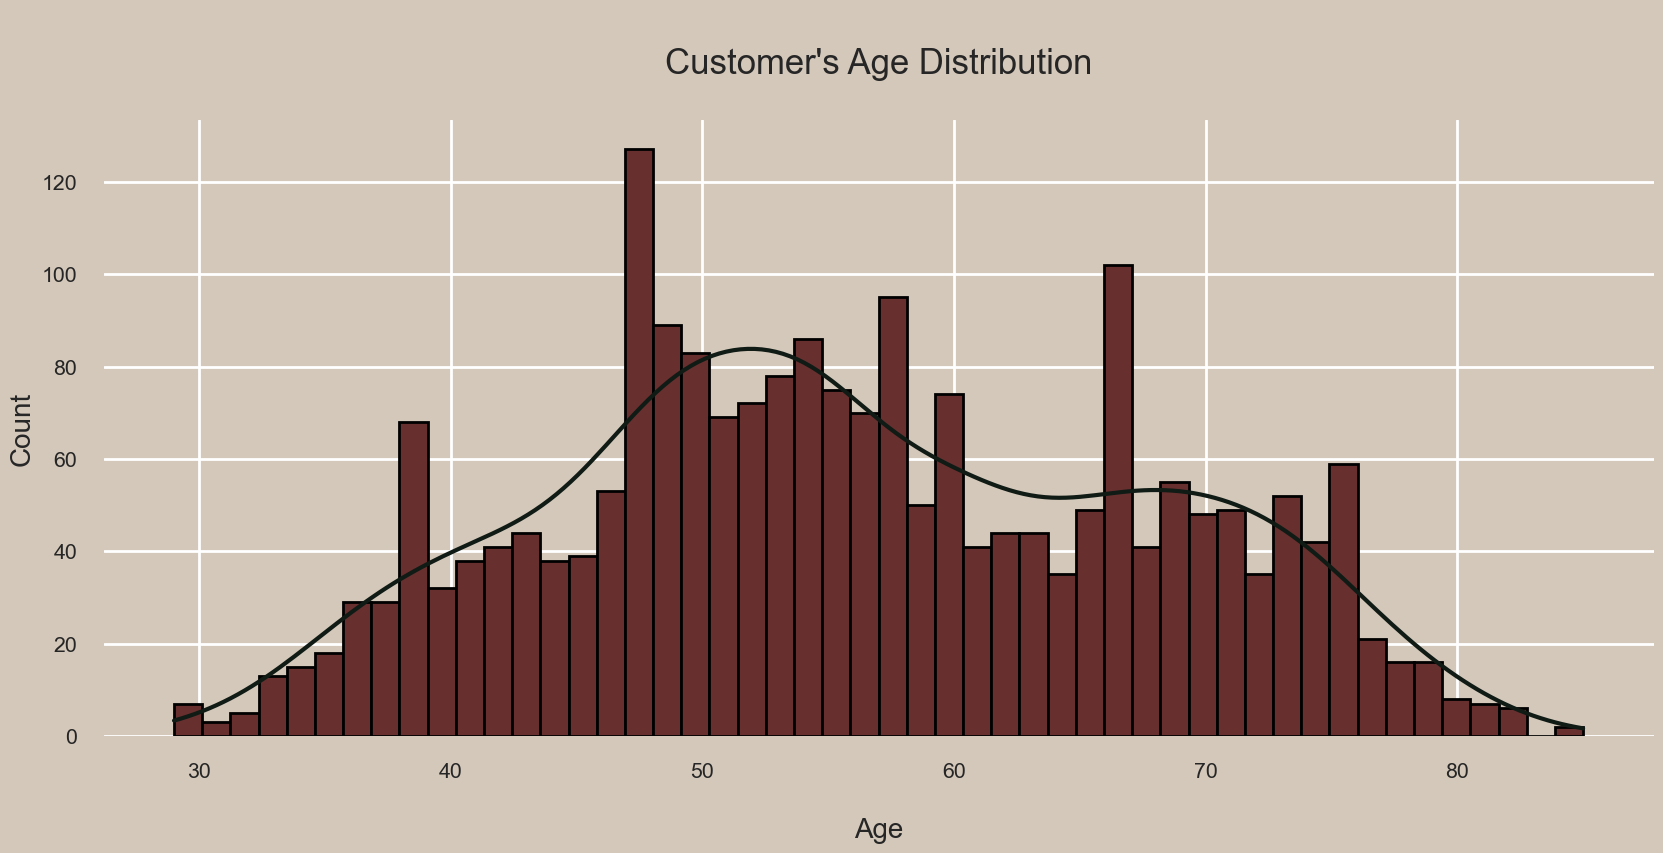

In [15]:
print(f"Let's have a look on the distribution of customer's age:")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["Age"], color="#682f2f", kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
p.axes.lines[0].set_color(palette[0])
p.set_title("\nCustomer's Age Distribution\n", fontsize=25)
p.set_xlabel("\nAge", fontsize=20)
p.set_ylabel("Count", fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

### **Insights**:
- This is a normal distribution of the customer's age.
- Most of the customers are from 36 to 50.

Let's have a look on the distribution of customer's income and spending:


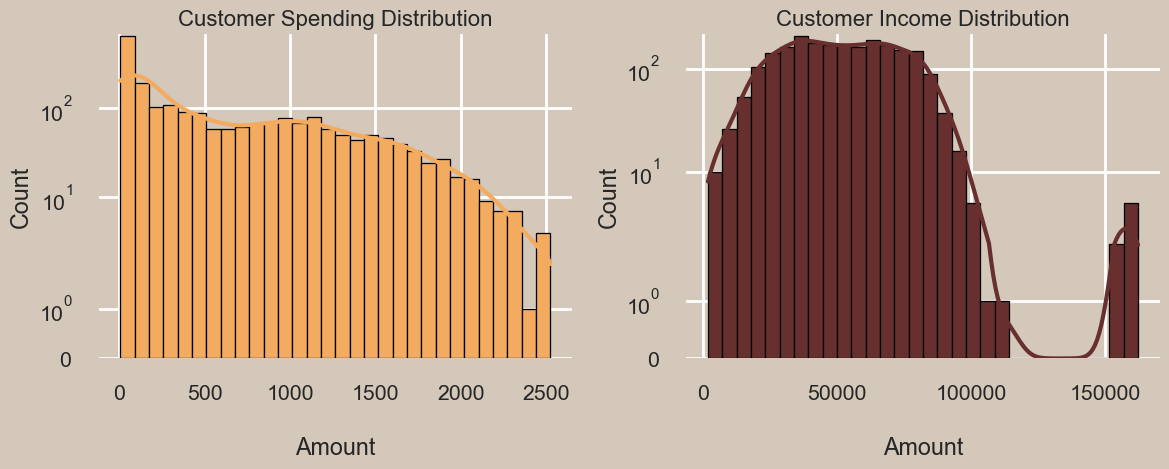

In [17]:
print(f"Let's have a look on the distribution of customer's income and spending:")
fig, axes = plt.subplots(1, 2, figsize=(12 ,5))

sns.histplot(data["Spent"], bins=30, kde=True, alpha=1, fill=True, edgecolor="black", color="#f3ab60", ax=axes[0])
axes[0].set_title("Customer Spending Distribution", fontsize=16)
axes[0].set_xlabel("\nAmount")
axes[0].set_ylabel("Count")
axes[0].set_yscale("symlog")
sns.despine(ax=axes[0], left=True, bottom=True)

sns.histplot(data["Income"], bins=30, kde=True, alpha=1, fill=True, edgecolor="black", color="#682f2f", ax=axes[1])
axes[1].set_title("Customer Income Distribution", fontsize=16)
axes[1].set_xlabel("\nAmount")
axes[1].set_ylabel("Count")
axes[1].set_yscale("symlog")
sns.despine(ax=axes[1], left=True, bottom=True)

plt.tight_layout()
plt.show()

### **Insights**:
- The income range of the majority of customers spans from 20000 to 80000.
- Almost all customers spend a very little portion of their income.